<a href="https://colab.research.google.com/github/tcmb1987/EE274-lossy-text-compression/blob/main/mech_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sent2vec
!pip install zstd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 6.9 MB/s 
     |████████████████████████████████| 182 kB 44.6 MB/s 
     |████████████████████████████████| 7.6 MB 48.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.6 MB/s 


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from urllib import request
from bs4 import BeautifulSoup
from sent2vec.vectorizer import Vectorizer
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import sys
import gzip
import zstd
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Excerpt 1: From the Book of Genesis from the King James Bible

In [ ]:
url = "https://www.gutenberg.org/cache/epub/10/pg10.txt"
sentences = []
words = set(nltk.corpus.words.words())

response = request.urlopen(url)
soup = BeautifulSoup(response, features="html.parser")
text = soup.get_text()
sentences += sent_tokenize(text)

# Strip random symbols/non-English
sentences = list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sentences))
sentences = [sentence.replace("\r", "") for sentence in sentences]
sentences = [sentence.replace("\n", " ") for sentence in sentences]
sentences = [sentence.replace(":", "") for sentence in sentences]
# sentences = [re.sub(r'[^\w\s]', '', sentence) for sentence in sentences]
sentences = ["".join(i for i in s if not i.isdigit()) for s in sentences]
sentences = sentences[4:]
sentences = [s for s in sentences if not len(s) > 512]

stop_words = set(stopwords.words('english'))
  
def prune_sentence(sentence, stop_words):
    word_tokens = word_tokenize(sentence)
    return ' '.join([w for w in word_tokens if not w.lower() in stop_words and not w.lower() in string.punctuation]) 

pruned_sentences = [prune_sentence(sentence, stop_words) for sentence in sentences]

In [ ]:
original_text = ' '.join(sentences)
pruned_text = ' '.join(pruned_sentences)
original_size = (sys.getsizeof(original_text) / 1024)
pruned_size = (sys.getsizeof(pruned_text) / 1024)

print("Uncompressed size of original text is %.2f KB." % original_size)
print("Uncompressed size of pruned text is %.2f KB." % pruned_size)
print("Pruned text is %.1f%% size of original text.\n" % (pruned_size/original_size*100))

original_compressed = gzip.compress(bytes(original_text, 'utf-8'))
pruned_compressed = gzip.compress(bytes(pruned_text, 'utf-8'))
original_size = (sys.getsizeof(original_compressed) / 1024)
pruned_size = (sys.getsizeof(pruned_compressed) / 1024)

print("Compressed size of original text using gzip is %.2f KB." % original_size)
print("Compressed size of pruned text using gzip is %.2f KB." % pruned_size)
print("Pruned text compresses to %.1f%% size of compressed original text.\n" % (pruned_size/original_size*100))

original_compressed = zstd.compress(bytes(original_text, 'utf-8'), 22)
pruned_compressed = zstd.compress(bytes(pruned_text, 'utf-8'), 22)
original_size = (sys.getsizeof(original_compressed) / 1024)
pruned_size = (sys.getsizeof(pruned_compressed) / 1024)

print("Compressed size of original text using zstd level 22 is %.2f KB." % original_size)
print("Compressed size of pruned text using zstd level 22 is %.2f KB." % pruned_size)
print("Pruned text compresses to %.1f%% size of compressed original text." % (pruned_size/original_size*100))

Uncompressed size of original text is 7742.31 KB.
Uncompressed size of pruned text is 4440.13 KB.
Pruned text is 57.3% size of original text.

Compressed size of original text using gzip is 1126.90 KB.
Compressed size of pruned text using gzip is 678.99 KB.
Pruned text compresses to 60.3% size of compressed original text.

Compressed size of original text using zstd level 22 is 853.40 KB.
Compressed size of pruned text using zstd level 22 is 541.40 KB.
Pruned text compresses to 63.4% size of compressed original text.


In [ ]:
sentences_1 = sentences[170:174]
sentences_1

[' And it came to pass in the six hundredth and first year, in the first month, the first day of the month, the waters were dried up from off the earth and Noah removed the covering of the ark, and looked, and, behold, the face of the ground was dry.',
 ' And in the second month, on the seven and twentieth day of the month, was the earth dried.',
 ' And God spake unto Noah, saying,  Go forth of the ark, thou, and thy wife, and thy sons, and thy sons’ wives with thee.',
 ' Bring forth with thee every living thing that is with thee, of all flesh, both of fowl, and of cattle, and of every creeping thing that creepeth upon the earth; that they may breed abundantly in the earth, and be fruitful, and multiply upon the earth.']

In [ ]:
original_vectorizer = Vectorizer()
original_vectorizer.run(sentences_1)
original_sentence_vectors = original_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
shorts_1 = pruned_sentences[170:174]
shorts_1

['came pass six hundredth first year first month first day month waters dried earth Noah removed covering ark looked behold face ground dry',
 'second month seven twentieth day month earth dried',
 'God spake unto Noah saying Go forth ark thou thy wife thy sons thy sons ’ wives thee',
 'Bring forth thee every living thing thee flesh fowl cattle every creeping thing creepeth upon earth may breed abundantly earth fruitful multiply upon earth']

In [ ]:
short_vectorizer = Vectorizer()
short_vectorizer.run(shorts_1)
short_sentence_vectors = short_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
reconstructed_1 = ['And it came to pass, that on the six hundredth and first year, in the first month, on the first day of the month, the waters dried on the earth and Noah removed the covering of the ark and looked to behold that the face of the ground was dry.', 'In the second month, on the seven and twentieth day of the month the earth was dried.', 'And God spake unto Noah saying, “Go forth from the ark thou, and thy wife, and thy sons, and thy sons ’ wives with thee', 'Bring forth with thee every living thing and with thee every flesh, and fowl, and cattle, and every creeping thing that creepeth upon the earth that they may breed abundantly so that the earth will be fruitful and multiply upon the earth.']
reconstructed_1

['And it came to pass, that on the six hundredth and first year, in the first month, on the first day of the month, the waters dried on the earth and Noah removed the covering of the ark and looked to behold that the face of the ground was dry.',
 'In the second month, on the seven and twentieth day of the month the earth was dried.',
 'And God spake unto Noah saying, “Go forth from the ark thou, and thy wife, and thy sons, and thy sons ’ wives with thee',
 'Bring forth with thee every living thing and with thee every flesh, and fowl, and cattle, and every creeping thing that creepeth upon the earth that they may breed abundantly so that the earth will be fruitful and multiply upon the earth.']

In [ ]:
reconst_vectorizer = Vectorizer()
reconst_vectorizer.run(reconstructed_1)
reconst_sentence_vectors = reconst_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Distances between pruned and original vectors

orig_distances = []

for i in range(len(sentences_1)):
  dist = distance.cosine(original_sentence_vectors[i], short_sentence_vectors[i])
  orig_distances.append(dist)

# Distances between reconstructed and original vectors

rest_distances = []

for i in range(len(sentences_1)):
  dist = distance.cosine(original_sentence_vectors[i], reconst_sentence_vectors[i])
  rest_distances.append(dist)

total_orig = orig_distances
total_rest = rest_distances

In [ ]:
orig_distances

[0.19824445247650146,
 0.12930917739868164,
 0.08913064002990723,
 0.05677163600921631]

In [ ]:
rest_distances

[0.012972772121429443,
 0.008686065673828125,
 0.004303872585296631,
 0.03312492370605469]

In [ ]:
np.mean(orig_distances)

0.11836397647857666

In [ ]:
np.mean(rest_distances)

0.014771908521652222

## Excerpt 2 - From Herman Melville's *Moby Dick*

In [ ]:
url = "https://www.gutenberg.org/files/2701/2701-0.txt"
sentences = []

response = request.urlopen(url)
soup = BeautifulSoup(response, features="html.parser")
text = soup.get_text()
sentences += sent_tokenize(text)

# Strip random symbols/non-English
sentences = list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sentences))
sentences = [sentence.replace("\r", "") for sentence in sentences]
sentences = [sentence.replace("\n", " ") for sentence in sentences]
sentences = [sentence.replace(":", "") for sentence in sentences]
# sentences = [re.sub(r'[^\w\s]', '', sentence) for sentence in sentences]
sentences = ["".join(i for i in s if not i.isdigit()) for s in sentences]
sentences = sentences[4:]
sentences = [s for s in sentences if not len(s) > 512]
  
def prune_sentence(sentence, stop_words):
    word_tokens = word_tokenize(sentence)
    return ' '.join([w for w in word_tokens if not w.lower() in stop_words and not w.lower() in string.punctuation]) 

pruned_sentences = [prune_sentence(sentence, stop_words) for sentence in sentences]

In [ ]:
original_text = ' '.join(sentences)
pruned_text = ' '.join(pruned_sentences)
original_size = (sys.getsizeof(original_text) / 1024)
pruned_size = (sys.getsizeof(pruned_text) / 1024)

print("Uncompressed size of original text is %.2f KB." % original_size)
print("Uncompressed size of pruned text is %.2f KB." % pruned_size)
print("Pruned text is %.1f%% size of original text.\n" % (pruned_size/original_size*100))

original_compressed = gzip.compress(bytes(original_text, 'utf-8'))
pruned_compressed = gzip.compress(bytes(pruned_text, 'utf-8'))
original_size = (sys.getsizeof(original_compressed) / 1024)
pruned_size = (sys.getsizeof(pruned_compressed) / 1024)

print("Compressed size of original text using gzip is %.2f KB." % original_size)
print("Compressed size of pruned text using gzip is %.2f KB." % pruned_size)
print("Pruned text compresses to %.1f%% size of compressed original text.\n" % (pruned_size/original_size*100))

original_compressed = zstd.compress(bytes(original_text, 'utf-8'), 22)
pruned_compressed = zstd.compress(bytes(pruned_text, 'utf-8'), 22)
original_size = (sys.getsizeof(original_compressed) / 1024)
pruned_size = (sys.getsizeof(pruned_compressed) / 1024)

print("Compressed size of original text using zstd level 22 is %.2f KB." % original_size)
print("Compressed size of pruned text using zstd level 22 is %.2f KB." % pruned_size)
print("Pruned text compresses to %.1f%% size of compressed original text." % (pruned_size/original_size*100))

Uncompressed size of original text is 2241.26 KB.
Uncompressed size of pruned text is 1439.94 KB.
Pruned text is 64.2% size of original text.

Compressed size of original text using gzip is 444.39 KB.
Compressed size of pruned text using gzip is 292.33 KB.
Pruned text compresses to 65.8% size of compressed original text.

Compressed size of original text using zstd level 22 is 365.48 KB.
Compressed size of pruned text using zstd level 22 is 247.58 KB.
Pruned text compresses to 67.7% size of compressed original text.


In [ ]:
sentences_2 = sentences[455:460]
sentences_2

['Call me Ishmael.',
 'Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.',
 'It is a way I have of driving off the spleen and regulating the circulation.',
 'Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people’s hats off—then, I account it high time to get to sea as soon as I can.',
 'This is my substitute for pistol and ball.']

In [ ]:
original_vectorizer = Vectorizer()
original_vectorizer.run(sentences_2)
original_sentence_vectors = original_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
shorts_2 = pruned_sentences[455:460]
shorts_2

['Call Ishmael',
 'years ago—never mind long precisely—having little money purse nothing particular interest shore thought would sail little see watery part world',
 'way driving spleen regulating circulation',
 'Whenever find growing grim mouth whenever damp drizzly November soul whenever find involuntarily pausing coffin warehouses bringing rear every funeral meet especially whenever hypos get upper hand requires strong moral principle prevent deliberately stepping street methodically knocking people ’ hats off—then account high time get sea soon',
 'substitute pistol ball']

In [ ]:
short_vectorizer = Vectorizer()
short_vectorizer.run(shorts_2)
short_sentence_vectors = short_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
reconstructed_2 = ['Call me Ishmael', 'Some years ago—never mind how long precisely—having little money in my purse and nothing particular of interest on shore, I thought I would sail a little to see the watery part of the world', 'It was a way of driving my spleen and regulating my circulation', 'Whenever I find I am growing grim in the mouth or whenever it is damp and drizzly like November in my soul, or whenever I find myself involuntarily pausing at coffin warehouses or bringing up the rear at every funeral I meet; and especially whenever hypos get the upper hand of me and it requires strong moral principle to prevent me from deliberately stepping into the street and methodically knocking people’s hats off—then account high time to get to sea as soon as I can', 'This is my substitute for a pistol and ball']
reconstructed_2

['Call me Ishmael',
 'Some years ago—never mind how long precisely—having little money in my purse and nothing particular of interest on shore, I thought I would sail a little to see the watery part of the world',
 'It was a way of driving my spleen and regulating my circulation',
 'Whenever I find I am growing grim in the mouth or whenever it is damp and drizzly like November in my soul, or whenever I find myself involuntarily pausing at coffin warehouses or bringing up the rear at every funeral I meet; and especially whenever hypos get the upper hand of me and it requires strong moral principle to prevent me from deliberately stepping into the street and methodically knocking people’s hats off—then account high time to get to sea as soon as I can',
 'This is my substitute for a pistol and ball']

In [ ]:
reconst_vectorizer = Vectorizer()
reconst_vectorizer.run(reconstructed_2)
reconst_sentence_vectors = reconst_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Distances between pruned and original vectors

orig_distances = []

for i in range(len(sentences_2)):
  dist = distance.cosine(original_sentence_vectors[i], short_sentence_vectors[i])
  orig_distances.append(dist)

# Distances between reconstructed and original vectors

rest_distances = []

for i in range(len(sentences_2)):
  dist = distance.cosine(original_sentence_vectors[i], reconst_sentence_vectors[i])
  rest_distances.append(dist)

total_orig += orig_distances
total_rest += rest_distances

In [ ]:
orig_distances

[0.032640695571899414,
 0.05033355951309204,
 0.028860092163085938,
 0.2735424041748047,
 0.03151208162307739]

In [ ]:
rest_distances

[0.004494011402130127,
 0.004813849925994873,
 0.009506165981292725,
 0.011010468006134033,
 0.010721981525421143]

In [ ]:
np.mean(orig_distances)

0.0833777666091919

In [ ]:
np.mean(rest_distances)

0.00810929536819458

## Excerpt 3 - From Alexander Dumas' *The Count of Monte Cristo*

In [ ]:
url = "https://www.gutenberg.org/cache/epub/1184/pg1184.txt"
sentences = []

response = request.urlopen(url)
soup = BeautifulSoup(response, features="html.parser")
text = soup.get_text()
sentences += sent_tokenize(text)

# Strip random symbols/non-English
sentences = list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sentences))
sentences = [sentence.replace("\r", "") for sentence in sentences]
sentences = [sentence.replace("\n", " ") for sentence in sentences]
sentences = [sentence.replace(":", "") for sentence in sentences]
# sentences = [re.sub(r'[^\w\s]', '', sentence) for sentence in sentences]
sentences = ["".join(i for i in s if not i.isdigit()) for s in sentences]
sentences = sentences[4:]
sentences = [s for s in sentences if not len(s) > 512]
  
def prune_sentence(sentence, stop_words):
    word_tokens = word_tokenize(sentence)
    return ' '.join([w for w in word_tokens if not w.lower() in stop_words and not w.lower() in string.punctuation]) 

pruned_sentences = [prune_sentence(sentence, stop_words) for sentence in sentences]

In [ ]:
original_text = ' '.join(sentences)
pruned_text = ' '.join(pruned_sentences)
original_size = (sys.getsizeof(original_text) / 1024)
pruned_size = (sys.getsizeof(pruned_text) / 1024)

print("Uncompressed size of original text is %.2f KB." % original_size)
print("Uncompressed size of pruned text is %.2f KB." % pruned_size)
print("Pruned text is %.1f%% size of original text.\n" % (pruned_size/original_size*100))

original_compressed = gzip.compress(bytes(original_text, 'utf-8'))
pruned_compressed = gzip.compress(bytes(pruned_text, 'utf-8'))
original_size = (sys.getsizeof(original_compressed) / 1024)
pruned_size = (sys.getsizeof(pruned_compressed) / 1024)

print("Compressed size of original text using gzip is %.2f KB." % original_size)
print("Compressed size of pruned text using gzip is %.2f KB." % pruned_size)
print("Pruned text compresses to %.1f%% size of compressed original text.\n" % (pruned_size/original_size*100))

original_compressed = zstd.compress(bytes(original_text, 'utf-8'), 22)
pruned_compressed = zstd.compress(bytes(pruned_text, 'utf-8'), 22)
original_size = (sys.getsizeof(original_compressed) / 1024)
pruned_size = (sys.getsizeof(pruned_compressed) / 1024)

print("Compressed size of original text using zstd level 22 is %.2f KB." % original_size)
print("Compressed size of pruned text using zstd level 22 is %.2f KB." % pruned_size)
print("Pruned text compresses to %.1f%% size of compressed original text." % (pruned_size/original_size*100))

Uncompressed size of original text is 4456.52 KB.
Uncompressed size of pruned text is 2823.45 KB.
Pruned text is 63.4% size of original text.

Compressed size of original text using gzip is 815.21 KB.
Compressed size of pruned text using gzip is 519.64 KB.
Pruned text compresses to 63.7% size of compressed original text.

Compressed size of original text using zstd level 22 is 630.15 KB.
Compressed size of pruned text using zstd level 22 is 422.44 KB.
Pruned text compresses to 67.0% size of compressed original text.


In [ ]:
sentences_3 = sentences[281:285]
sentences_3

['The Catalans  Beyond a bare, weather-worn wall, about a hundred paces from the spot where the two friends sat looking and listening as they drank their wine, was the village of the Catalans.',
 'Long ago this mysterious colony quitted Spain, and settled on the tongue of land on which it is to this day.',
 'Whence it came no one knew, and it spoke an unknown tongue.',
 'One of its chiefs, who understood Provençal, begged the commune of Marseilles to give them this bare and barren promontory, where, like the sailors of old, they had run their boats ashore.']

In [ ]:
original_vectorizer = Vectorizer()
original_vectorizer.run(sentences_3)
original_sentence_vectors = original_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
shorts_3 = pruned_sentences[281:285]
shorts_3

['Catalans Beyond bare weather-worn wall hundred paces spot two friends sat looking listening drank wine village Catalans',
 'Long ago mysterious colony quitted Spain settled tongue land day',
 'Whence came one knew spoke unknown tongue',
 'One chiefs understood Provençal begged commune Marseilles give bare barren promontory like sailors old run boats ashore']

In [ ]:
short_vectorizer = Vectorizer()
short_vectorizer.run(shorts_3)
short_sentence_vectors = short_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
reconstructed_3 = ['The Catalans – Beyond a bare, weather-worn wall, about a hundred paces from the spot where two friends sat looking and listening while they drank wine, was the village of the Catalans.', 'Long ago, this mysterious colony had quitted Spain, and settled on the tongue of land where it is to this day', 'Whence it came no one knew and it spoke an unknown tongue', 'One of the chiefs who understood Provençal begged to commune with Marseilles to give them bare, barren promontory, where, like sailors of old they had run boats ashore']
reconstructed_3

['The Catalans – Beyond a bare, weather-worn wall, about a hundred paces from the spot where two friends sat looking and listening while they drank wine, was the village of the Catalans.',
 'Long ago, this mysterious colony had quitted Spain, and settled on the tongue of land where it is to this day',
 'Whence it came no one knew and it spoke an unknown tongue',
 'One of the chiefs who understood Provençal begged to commune with Marseilles to give them bare, barren promontory, where, like sailors of old they had run boats ashore']

In [ ]:
reconst_vectorizer = Vectorizer()
reconst_vectorizer.run(reconstructed_3)
reconst_sentence_vectors = reconst_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Distances between pruned and original vectors

orig_distances = []

for i in range(len(sentences_3)):
  dist = distance.cosine(original_sentence_vectors[i], short_sentence_vectors[i])
  orig_distances.append(dist)

# Distances between reconstructed and original vectors

rest_distances = []

for i in range(len(sentences_3)):
  dist = distance.cosine(original_sentence_vectors[i], reconst_sentence_vectors[i])
  rest_distances.append(dist)

total_orig += orig_distances
total_rest += rest_distances

In [ ]:
orig_distances

[0.11813569068908691,
 0.08501327037811279,
 0.08286517858505249,
 0.06080502271652222]

In [ ]:
rest_distances

[0.002785325050354004,
 0.004799246788024902,
 0.014127016067504883,
 0.016070663928985596]

In [ ]:
np.mean(orig_distances)

0.0867047905921936

In [ ]:
np.mean(rest_distances)

0.009445562958717346

## Excerpt 4 - From Kenneth Grahame's *The Wind in the Willows*

In [ ]:
url = "https://www.gutenberg.org/files/289/289-0.txt"
sentences = []

response = request.urlopen(url)
soup = BeautifulSoup(response, features="html.parser")
text = soup.get_text()
sentences += sent_tokenize(text)

# Strip random symbols/non-English
sentences = list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sentences))
sentences = [sentence.replace("\r", "") for sentence in sentences]
sentences = [sentence.replace("\n", " ") for sentence in sentences]
sentences = [sentence.replace(":", "") for sentence in sentences]
# sentences = [re.sub(r'[^\w\s]', '', sentence) for sentence in sentences]
sentences = ["".join(i for i in s if not i.isdigit()) for s in sentences]
sentences = sentences[4:]
sentences = [s for s in sentences if not len(s) > 512]
  
def prune_sentence(sentence, stop_words):
    word_tokens = word_tokenize(sentence)
    return ' '.join([w for w in word_tokens if not w.lower() in stop_words and not w.lower() in string.punctuation]) 

pruned_sentences = [prune_sentence(sentence, stop_words) for sentence in sentences]

In [ ]:
original_text = ' '.join(sentences)
pruned_text = ' '.join(pruned_sentences)
original_size = (sys.getsizeof(original_text) / 1024)
pruned_size = (sys.getsizeof(pruned_text) / 1024)

print("Uncompressed size of original text is %.2f KB." % original_size)
print("Uncompressed size of pruned text is %.2f KB." % pruned_size)
print("Pruned text is %.1f%% size of original text.\n" % (pruned_size/original_size*100))

original_compressed = gzip.compress(bytes(original_text, 'utf-8'))
pruned_compressed = gzip.compress(bytes(pruned_text, 'utf-8'))
original_size = (sys.getsizeof(original_compressed) / 1024)
pruned_size = (sys.getsizeof(pruned_compressed) / 1024)

print("Compressed size of original text using gzip is %.2f KB." % original_size)
print("Compressed size of pruned text using gzip is %.2f KB." % pruned_size)
print("Pruned text compresses to %.1f%% size of compressed original text.\n" % (pruned_size/original_size*100))

original_compressed = zstd.compress(bytes(original_text, 'utf-8'), 22)
pruned_compressed = zstd.compress(bytes(pruned_text, 'utf-8'), 22)
original_size = (sys.getsizeof(original_compressed) / 1024)
pruned_size = (sys.getsizeof(pruned_compressed) / 1024)

print("Compressed size of original text using zstd level 22 is %.2f KB." % original_size)
print("Compressed size of pruned text using zstd level 22 is %.2f KB." % pruned_size)
print("Pruned text compresses to %.1f%% size of compressed original text." % (pruned_size/original_size*100))

Uncompressed size of original text is 634.39 KB.
Uncompressed size of pruned text is 392.90 KB.
Pruned text is 61.9% size of original text.

Compressed size of original text using gzip is 121.75 KB.
Compressed size of pruned text using gzip is 77.71 KB.
Pruned text compresses to 63.8% size of compressed original text.

Compressed size of original text using zstd level 22 is 106.02 KB.
Compressed size of pruned text using zstd level 22 is 69.88 KB.
Pruned text compresses to 65.9% size of compressed original text.


In [ ]:
sentences_4 = sentences[12:16]
sentences_4

['THE RIVER BANK   The Mole had been working very hard all the morning, spring-cleaning his little home.',
 'First with brooms, then with dusters; then on ladders and steps and chairs, with a brush and a pail of whitewash; till he had dust in his throat and eyes, and splashes of whitewash all over his black fur, and an aching back and weary arms.',
 'Spring was moving in the air above and in the earth below and around him, penetrating even his dark and lowly little house with its spirit of divine discontent and longing.',
 'It was small wonder, then, that he suddenly flung down his brush on the floor, said “Bother!” and “O blow!” and also “Hang spring-cleaning!” and bolted out of the house without even waiting to put on his coat.']

In [ ]:
original_vectorizer = Vectorizer()
original_vectorizer.run(sentences_4)
original_sentence_vectors = original_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
shorts_4 = pruned_sentences[12:16]
shorts_4

['RIVER BANK Mole working hard morning spring-cleaning little home',
 'First brooms dusters ladders steps chairs brush pail whitewash till dust throat eyes splashes whitewash black fur aching back weary arms',
 'Spring moving air earth around penetrating even dark lowly little house spirit divine discontent longing',
 'small wonder suddenly flung brush floor said “ Bother ” “ blow ” also “ Hang spring-cleaning ” bolted house without even waiting put coat']

In [ ]:
short_vectorizer = Vectorizer()
short_vectorizer.run(shorts_4)
short_sentence_vectors = short_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
reconstructed_4 = ['THE RIVER BANK – The Mole was working hard this morning on spring-cleaning in its little home', 'First with brooms, then with dusters, then with ladders, then with steps, then with chairs, then with a brush and a pail, and then with whitewash, till dust was in its throat and eyes and splashes of whitewash was in its black fur and it had an aching back and weary arms', 'Spring was moving in the air and the earth  around it penetrating even the dark lowly little house with its spirit of divine and discontent longing', 'It was a small wonder that it suddenly flung its brush on the floor said “ Bother” and “ blow ” and also “ Hang spring-cleaning ” and bolted out of the house without even waiting to put on a coat.']
reconstructed_4

['THE RIVER BANK – The Mole was working hard this morning on spring-cleaning in its little home',
 'First with brooms, then with dusters, then with ladders, then with steps, then with chairs, then with a brush and a pail, and then with whitewash, till dust was in its throat and eyes and splashes of whitewash was in its black fur and it had an aching back and weary arms',
 'Spring was moving in the air and the earth  around it penetrating even the dark lowly little house with its spirit of divine and discontent longing',
 'It was a small wonder that it suddenly flung its brush on the floor said “ Bother” and “ blow ” and also “ Hang spring-cleaning ” and bolted out of the house without even waiting to put on a coat.']

In [ ]:
reconst_vectorizer = Vectorizer()
reconst_vectorizer.run(reconstructed_4)
reconst_sentence_vectors = reconst_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Distances between pruned and original vectors

orig_distances = []

for i in range(len(sentences_1)):
  dist = distance.cosine(original_sentence_vectors[i], short_sentence_vectors[i])
  orig_distances.append(dist)

# Distances between reconstructed and original vectors

rest_distances = []

for i in range(len(sentences_1)):
  dist = distance.cosine(original_sentence_vectors[i], reconst_sentence_vectors[i])
  rest_distances.append(dist)

total_orig += orig_distances
total_rest += rest_distances

In [ ]:
orig_distances

[0.05235600471496582,
 0.19714993238449097,
 0.06711715459823608,
 0.07413583993911743]

In [ ]:
rest_distances

[0.020674824714660645,
 0.04645085334777832,
 0.0431559681892395,
 0.09053254127502441]

In [ ]:
np.mean(orig_distances)

0.09768973290920258

In [ ]:
np.mean(rest_distances)

0.05020354688167572

## Excerpt 5 - From Samuel Record's *The Mechanical Properties of Wood*

In [ ]:
url = "https://www.gutenberg.org/cache/epub/12299/pg12299.txt"
sentences = []

response = request.urlopen(url)
soup = BeautifulSoup(response, features="html.parser")
text = soup.get_text()
sentences += sent_tokenize(text)

# Strip random symbols/non-English
sentences = list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sentences))
sentences = [sentence.replace("\r", "") for sentence in sentences]
sentences = [sentence.replace("\n", " ") for sentence in sentences]
sentences = [sentence.replace(":", "") for sentence in sentences]
# sentences = [re.sub(r'[^\w\s]', '', sentence) for sentence in sentences]
sentences = ["".join(i for i in s if not i.isdigit()) for s in sentences]
sentences = sentences[4:]
sentences = [s for s in sentences if not len(s) > 512]
  
def prune_sentence(sentence, stop_words):
    word_tokens = word_tokenize(sentence)
    return ' '.join([w for w in word_tokens if not w.lower() in stop_words and not w.lower() in string.punctuation]) 

pruned_sentences = [prune_sentence(sentence, stop_words) for sentence in sentences]

In [ ]:
original_text = ' '.join(sentences)
pruned_text = ' '.join(pruned_sentences)
original_size = (sys.getsizeof(original_text) / 1024)
pruned_size = (sys.getsizeof(pruned_text) / 1024)

print("Uncompressed size of original text is %.2f KB." % original_size)
print("Uncompressed size of pruned text is %.2f KB." % pruned_size)
print("Pruned text is %.1f%% size of original text.\n" % (pruned_size/original_size*100))

original_compressed = gzip.compress(bytes(original_text, 'utf-8'))
pruned_compressed = gzip.compress(bytes(pruned_text, 'utf-8'))
original_size = (sys.getsizeof(original_compressed) / 1024)
pruned_size = (sys.getsizeof(pruned_compressed) / 1024)

print("Compressed size of original text using gzip is %.2f KB." % original_size)
print("Compressed size of pruned text using gzip is %.2f KB." % pruned_size)
print("Pruned text compresses to %.1f%% size of compressed original text.\n" % (pruned_size/original_size*100))

original_compressed = zstd.compress(bytes(original_text, 'utf-8'), 22)
pruned_compressed = zstd.compress(bytes(pruned_text, 'utf-8'), 22)
original_size = (sys.getsizeof(original_compressed) / 1024)
pruned_size = (sys.getsizeof(pruned_compressed) / 1024)

print("Compressed size of original text using zstd level 22 is %.2f KB." % original_size)
print("Compressed size of pruned text using zstd level 22 is %.2f KB." % pruned_size)
print("Pruned text compresses to %.1f%% size of compressed original text." % (pruned_size/original_size*100))

Uncompressed size of original text is 273.07 KB.
Uncompressed size of pruned text is 189.77 KB.
Pruned text is 69.5% size of original text.

Compressed size of original text using gzip is 85.79 KB.
Compressed size of pruned text using gzip is 60.30 KB.
Pruned text compresses to 70.3% size of compressed original text.

Compressed size of original text using zstd level 22 is 75.33 KB.
Compressed size of pruned text using zstd level 22 is 53.96 KB.
Pruned text compresses to 71.6% size of compressed original text.


In [ ]:
sentences_5 = sentences[20:25]
sentences_5

['This is a subject of interest to all who are concerned in the rational use of wood, and to the forester it also, by retrospection, suggests ways and means of regulating his forest product through control of the conditions of production.',
 'Attempt has been made, in the light of all data at hand, to answer many moot questions, such as the effect on the quality of wood of rate of growth, season of cutting, heartwood and sapwood, locality of growth, weight, water content, steaming, and defects.',
 'Part III describes methods of timber testing.',
 'They are for the most part those followed by the U.S. Forest Service.',
 'In schools equipped with the necessary machinery the instructions will serve to direct the tests; in others a study of the text with reference to the illustrations should give an adequate conception of the methods employed in this most important line of research.']

In [ ]:
original_vectorizer = Vectorizer()
original_vectorizer.run(sentences_5)
original_sentence_vectors = original_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
shorts_5 = pruned_sentences[20:25]
shorts_5

['subject interest concerned rational use wood forester also retrospection suggests ways means regulating forest product control conditions production',
 'Attempt made light data hand answer many moot questions effect quality wood rate growth season cutting heartwood sapwood locality growth weight water content steaming defects',
 'Part III describes methods timber testing',
 'part followed U.S. Forest Service',
 'schools equipped necessary machinery instructions serve direct tests others study text reference illustrations give adequate conception methods employed important line research']

In [ ]:
short_vectorizer = Vectorizer()
short_vectorizer.run(shorts_5)
short_sentence_vectors = short_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
reconstructed_5 = ['This is a subject of interest for those concerned with the rational use of wood, and the forester who also, in retrospection, suggests ways and means of regulating the forest product and control conditions of production.', 'Attempt being made, in light of the data in hand, can answer many moot questions, such as the effect of the quality of wood and the rate of growth through the season cutting heartwood sapwood locality growth weight water content steaming defects.', 'Part III describes methods for timber testing.', 'This part is followed by the U.S. Forest Service', 'Few schools are equipped with the necessary machinery instructions to serve as direct tests by others to study and some text reference have illustrations to give an adequate conception of the methods employed by those who are important to this line of research.']
reconstructed_5

['This is a subject of interest for those concerned with the rational use of wood, and the forester who also, in retrospection, suggests ways and means of regulating the forest product and control conditions of production.',
 'Attempt being made, in light of the data in hand, can answer many moot questions, such as the effect of the quality of wood and the rate of growth through the season cutting heartwood sapwood locality growth weight water content steaming defects.',
 'Part III describes methods for timber testing.',
 'This part is followed by the U.S. Forest Service',
 'Few schools are equipped with the necessary machinery instructions to serve as direct tests by others to study and some text reference have illustrations to give an adequate conception of the methods employed by those who are important to this line of research.']

In [ ]:
reconst_vectorizer = Vectorizer()
reconst_vectorizer.run(reconstructed_5)
reconst_sentence_vectors = reconst_vectorizer.vectors

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Distances between pruned and original vectors

orig_distances = []

for i in range(len(sentences_1)):
  dist = distance.cosine(original_sentence_vectors[i], short_sentence_vectors[i])
  orig_distances.append(dist)

# Distances between reconstructed and original vectors

rest_distances = []

for i in range(len(sentences_1)):
  dist = distance.cosine(original_sentence_vectors[i], reconst_sentence_vectors[i])
  rest_distances.append(dist)

total_orig += orig_distances
total_rest += rest_distances

In [ ]:
orig_distances

[0.09673863649368286,
 0.10230803489685059,
 0.1848222017288208,
 0.04450470209121704]

In [ ]:
rest_distances

[0.05947297811508179,
 0.025128841400146484,
 0.010802388191223145,
 0.024391591548919678]

In [ ]:
np.mean(orig_distances)

0.10709339380264282

In [ ]:
np.mean(rest_distances)

0.029948949813842773

## Plots

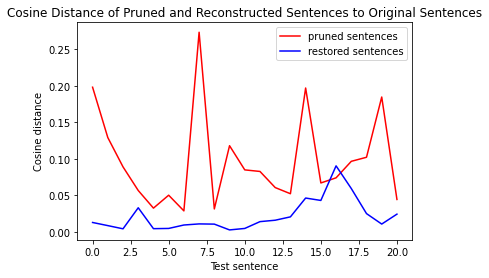

In [ ]:
plt.plot(total_orig, color='r', label='pruned sentences')
plt.plot(total_rest, color='b', label='restored sentences')
plt.ylabel('Cosine distance')
plt.xlabel('Test sentence')
plt.title("Cosine Distance of Pruned and Reconstructed Sentences to Original Sentences")
plt.legend()
plt.show()

In [ ]:
np.mean(total_rest)

0.02181077854973929